## 코랩기준 좌측에 목차를 작성해놓았습니다. 
##목차를 참고하시면서 보시면 조금더 수월하게 보실 수 있으실 것 같습니다.

#** 프로젝트 주제 : X-ray 이미지 기반 질병 진단(CNN활용) & COVID-19 X-ray 이미지 생성(GAN)**

## **PART0. X-ray 이미지 출처**

- [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
- [Chest X-ray (Covid-19 & Pneumonia)](https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia)
- [COVID-19 Radiography Database](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)
- [Tuberculosis (TB) Chest X-ray Database](https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset)

## **PART1. X-ray 이미지 기반 질병 진단(CNN활용)**

### **1-1** X-ray 데이터 불러오기 및 압축해제

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
!unzip /gdrive/MyDrive/코드스테이츠/개인프로젝트/section4/COVID19_Database.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating: COVID-19_Radio

In [ ]:
!unzip /gdrive/MyDrive/코드스테이츠/개인프로젝트/section4/covid_2.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/COVID19(244).jpg

In [ ]:
!unzip /gdrive/MyDrive/코드스테이츠/개인프로젝트/section4/Tuberculosis.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2800.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2801.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2802.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2803.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2804.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2805.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2806.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2807.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2808.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2809.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-281.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2810.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2811.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-2812.png  
  inflating: 

### **1-2** 패키지 호출 및 시드고정

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import numpy as np 
import pandas as pd 
import cv2
import os

In [ ]:
# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

# Set the numpy seed
np.random.seed(111)

### **1-3** 데이터 전처리

        총 세개의 데이터셋을 사용했으며, 이중 필요한 데이터셋만 선택적으로 얻어냈습니다.
        출처가 불분명한 데이터가 존재하여서 일부 이미지는 과감하게 제거했습니다.
        Normal             : 0으로 라벨링
        Tuberculosis(결핵) : 1로 라벨링
        COVID-19           : 2로 라벨링

In [ ]:
## 이미지를 모으기 위한 함수 정의

label_1 = 'Normal'
img_size = 128  #이미지 사이즈 고정
def get_training_data_1(data_dir):
    data = [] 
    path = os.path.join(data_dir, label_1)    # data_dir = /content/chest_xray/chest_xray/train, label = 'PNEUMONIA' 이라면 os.path.join(data_dir, label)의 결과는 "/content/chest_xray/chest_xray/train/PNEUMONIA" 이다
    class_num = 0        # 'NORMAL'은 0으로 라벨링
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # 로컬경로의 이미지 파일 읽는법, GRAYSCALE : 이미지를 흑백으로 읽어들임
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append([resized_arr, class_num])
        except Exception as e:
            print(e)
    return data


label_2 = 'Tuberculosis'
def get_training_data_2(data_dir):
    data = [] 
    path = os.path.join(data_dir, label_2)   
    class_num = 1        # Tuberculosis'는 1로 라벨링
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
            data.append([resized_arr, class_num])
        except Exception as e:
            print(e)
    return data


label_3 = 'COVID'
def get_training_data_3(data_dir):
    data = [] 
    path = os.path.join(data_dir, label_3)    
    class_num = 2       
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
            resized_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([resized_arr, class_num])
        except Exception as e:
            print(e)
    return data


label_4 = 'NORMAL'
img_size = 128
def get_training_data_4(data_dir):
    data = [] 
    path = os.path.join(data_dir, label_4)    
    class_num = 0       
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
            data.append([resized_arr, class_num])
        except Exception as e:
            print(e)
    return data


label_5 = 'COVID19'
def get_training_data_5(data_dir):
    data = [] 
    path = os.path.join(data_dir, label_5)   
    class_num = 2        # 'COVID19'는 2로 라벨링
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # 로컬경로의 이미지 파일 읽는법, GRAYSCALE : 이미지를 흑백으로 읽어들임
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append([resized_arr, class_num])
        except Exception as e:
            print(e)
    return data

In [ ]:
## 'TUBERCULOSIS'이미지

Tuberculosis = get_training_data_2('/content/TB_Chest_Radiography_Database')

In [ ]:
len(Tuberculosis) 

3500

In [ ]:
## COVID19 이미지 

Covid19 = get_training_data_3('/content/COVID-19_Radiography_Dataset')

In [ ]:
len(Covid19)

3616

In [ ]:
## 'NORMAL', 'COVID19'이미지

Normal = get_training_data_4('/content/Data/train')
Normal_2 = get_training_data_4('/content/Data/test')
Covid19_2 = get_training_data_5('/content/Data/train')
Covid19_3 = get_training_data_5('/content/Data/test')

In [ ]:
len(Normal), len(Normal_2), len(Covid19_2),  len(Covid19_3)

(1266, 317, 460, 116)

In [ ]:
## Normal, Normal_2, Normal_3, Normal_4 이미지 통합


print("Normal  의 이미지 수 :" , len(Normal) )
print("Normal_2의 이미지 수 :" , len(Normal_2) )

for i in Normal_2 :
  Normal.append(i)


print("Normal 이미지 통합후 총 이미지 수 :" , len(Normal)) 

Normal  의 이미지 수 : 1266
Normal_2의 이미지 수 : 317
Normal 이미지 통합후 총 이미지 수 : 1583


In [ ]:
#@ Covid19, Covid19_2, Covid19_3 이미지 통합


print("Covid19  의 이미지 수 :" , len(Covid19) )
print("Covid19_2의 이미지 수 :" , len(Covid19_2) )
print("Covid19_3의 이미지 수 :" , len(Covid19_3) )

for i in Covid19_2 :
  Covid19.append(i)
for i in Covid19_3 :
  Covid19.append(i)


print("Covid19 이미지 통합후 총 이미지 수 :" , len(Covid19)) 

Covid19  의 이미지 수 : 3616
Covid19_2의 이미지 수 : 460
Covid19_3의 이미지 수 : 116
Covid19 이미지 통합후 총 이미지 수 : 4192


In [ ]:
#@ Tuberculosis 이미지 수

len(Tuberculosis)

3500

In [ ]:
## Normal 이미지 데이터셋 분할 : 'train : val : test = 6 : 2 : 2' 로 분할했습니다.
# training set, test set을 8:2로 분할했습니다.
train_1, test_1 = train_test_split(Normal, test_size=0.20, random_state=7)
# training set, validation set을 8:2로 분할했습니다.
train_1, val_1 = train_test_split(train_1, test_size=0.25, random_state=7) # 0.25 x 0.8 = 0.2



## Covid19 이미지 데이터셋 분할 : 'train : val : test = 6 : 2 : 2' 로 분할했습니다.
# training set, test set을 8:2로 분할했습니다.
train_2, test_2 = train_test_split(Covid19, test_size=0.20, random_state=7)
# training set, validation set을 8:2로 분할했습니다.
train_2, val_2 = train_test_split(train_2, test_size=0.25, random_state=7) # 0.25 x 0.8 = 0.2



## Tuberculosis 이미지 데이터셋 분할 : 'train : val : test = 6 : 2 : 2' 로 분할했습니다.
# training set, test set을 8:2로 분할했습니다.
train_3, test_3 = train_test_split(Tuberculosis, test_size=0.20, random_state=7)
# training set, validation set을 8:2로 분할했습니다.
train_3, val_3 = train_test_split(train_3, test_size=0.25, random_state=7) # 0.25 x 0.8 = 0.2

In [ ]:
## 분리되어있는 train, test, val set을 각각 합칩니다.

train = []
for i in train_1 :
  train.append(i)
for i in train_2 :
  train.append(i)
for i in train_3 :
  train.append(i)

test = []
for i in test_1 :
  test.append(i)
for i in test_2 :
  test.append(i)
for i in test_3 :
  test.append(i)


val = []
for i in val_1 :
  val.append(i)
for i in val_2 :
  val.append(i)
for i in val_3 :
  val.append(i)

In [ ]:
## numpy array로 변환

train = np.array(train)
test = np.array(test)
val = np.array(val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


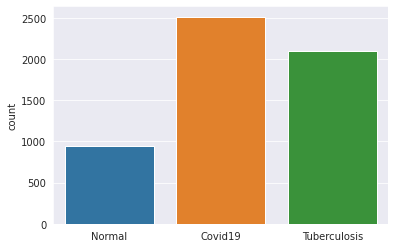

In [ ]:
## 카테고리별 이미지 수 시각화
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")    # 'PNEUMONIA'는 1,  'NORMAL'은 0으로 라벨링
    elif (i[1] == 1):
        l.append("Tuberculosis")
    else:
        l.append("Covid19")
sns.set_style('darkgrid')
sns.countplot(l) # 숫자 1이 아니고 '엘(L)' 입니다

In [ ]:
## train set에서 NORMAL인 사진 번호 찾기

num = 1
for i in train:
  num +=1
  if i[1] == 1:
    print(num)  

Text(0.5, 1.0, 'Covid19')

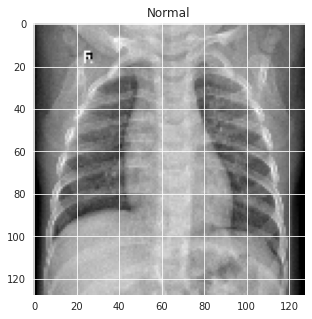

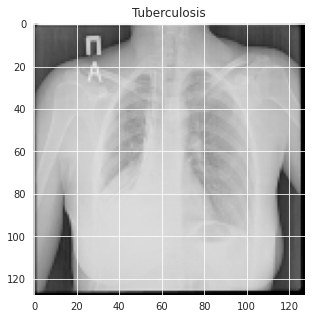

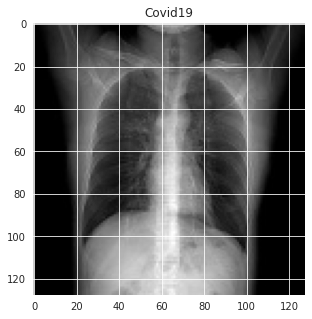

In [ ]:
## 카테고리별 이미지 샘플 시각화

labels = ["Normal", 'Tuberculosis', "Covid19"]

plt.figure(figsize = (5,5))
plt.imshow(train[910][0], cmap='gray')  #numpy array 형태(train[0][0])를 이미지화(train[0][1]은 라벨번호임)
plt.title(labels[train[910][1]])        #labels = ["Normal", 'Tuberculosis', "Covid19"]

plt.figure(figsize = (5,5))
plt.imshow(train[5537][0], cmap='gray')
plt.title(labels[train[5537][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[3451][0], cmap='gray')
plt.title(labels[train[3451][1]])       #train[-1] : list인 train의 맨 마지막 요소

In [ ]:
## train, test, val set에서 lable 분리

x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:           #train이라는 리스트 안에 있는 2가지 요소(이미지넘파이어레이, 라벨번호)를 분리
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
## Normalize the data

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((5563, 128, 128), (1856, 128, 128), (1856, 128, 128))

In [ ]:
## resize data for deep learning (img_size = 128)

x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

### **1-4** 모델 학습

In [ ]:
## With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
## 모델 구성 및 컴파일

model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 3 , activation = 'softmax'))
model.compile(optimizer = "rmsprop" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy']) 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
batch_normalization_22 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)       

In [ ]:
## learning_rate_reduction 정의

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
## 모델학습

history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 30 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/30
174/174 [==============================] - 10s 52ms/step - loss: 1.6974 - accuracy: 0.6794 - val_loss: 8.2893 - val_accuracy: 0.4520
Epoch 2/30
174/174 [==============================] - 9s 51ms/step - loss: 0.4619 - accuracy: 0.8297 - val_loss: 5.4933 - val_accuracy: 0.5706
Epoch 3/30
174/174 [==============================] - 9s 51ms/step - loss: 0.2930 - accuracy: 0.8935 - val_loss: 1.5743 - val_accuracy: 0.6579
Epoch 4/30
174/174 [==============================] - 9s 51ms/step - loss: 0.2987 - accuracy: 0.8970 - val_loss: 0.4631 - val_accuracy: 0.8518
Epoch 5/30
174/174 [==============================] - 9s 51ms/step - loss: 0.2744 - accuracy: 0.9073 - val_loss: 1.0699 - val_accuracy: 0.7856
Epoch 6/30
174/174 [==============================] - 9s 51ms/step - loss: 0.2124 - accuracy: 0.9319 - val_loss: 8.7439 - val_accuracy: 0.5490

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/30
174/174 [==============================] - 9s 53m

### **1-5** 모델 학습 결과

In [ ]:
## 학습된 모델의 Loss와 Accuracy 출력

print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

58/58 [==============================] - 0s 5ms/step - loss: 0.5123 - accuracy: 0.8971
Loss of the model is -  0.5122590661048889
58/58 [==============================] - 0s 5ms/step - loss: 0.5123 - accuracy: 0.8971
Accuracy of the model is -  89.7090494632721 %


In [ ]:
## 모델 저장하기
from keras.models import load_model
model.save('Xray_classification_model_first.h5')

In [ ]:
# ## 모델 불러오기
# from keras.models import load_model
# loaded_model = load_model('Xray_classification_model.h5')

# ## 모델 사용하기

# new_predictions = loaded_model.predict_classes(x_test)
# new_predictions = new_predictions.reshape(1,-1)[0]
# new_predictions

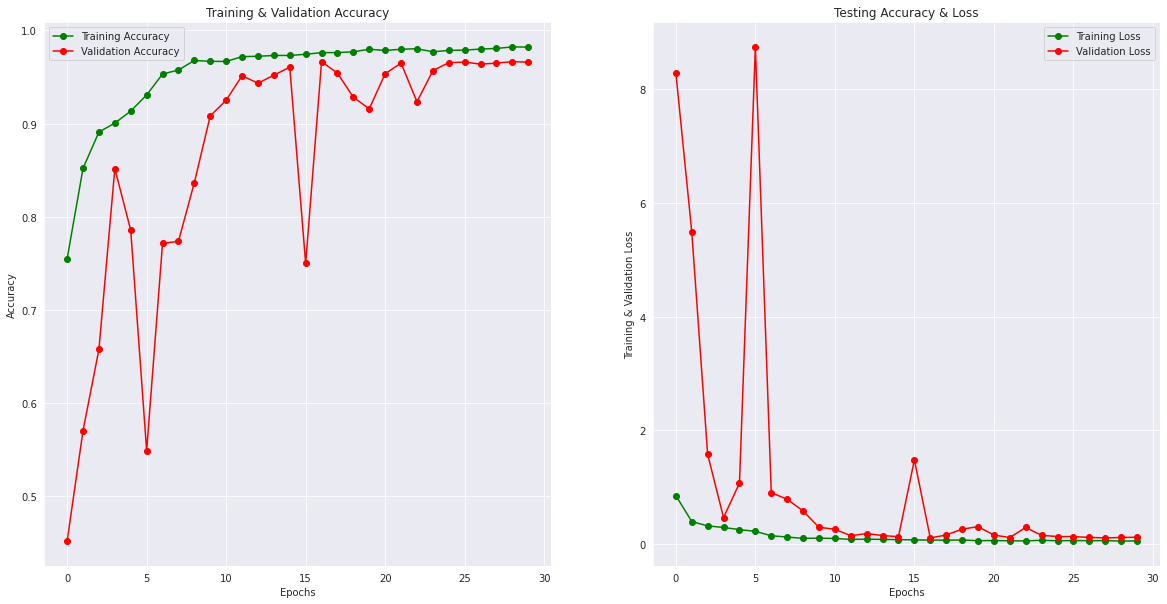

In [ ]:
## epoch에 따른 Loss와 Accuracy 시각화

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
## 테스트셋 예측결과를 객체저장

predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
## 카테고리별 precision    recall  f1-score와 accuracy 출력

print(classification_report(y_test, predictions, target_names = ['Normal (Class 0)','Tuberculosis (Class 1)', 'Covid19 (Class 2)']))

                        precision    recall  f1-score   support

      Normal (Class 0)       0.84      0.99      0.91       317
Tuberculosis (Class 1)       0.98      0.77      0.86       700
     Covid19 (Class 2)       0.87      0.97      0.92       839

              accuracy                           0.90      1856
             macro avg       0.90      0.91      0.90      1856
          weighted avg       0.91      0.90      0.89      1856



In [ ]:
## confusion_matrix 생성 시작

cm = confusion_matrix(y_test,predictions)
cm

array([[313,   0,   4],
       [ 48, 537, 115],
       [ 11,  13, 815]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0', '1', '2'] , columns = ['0', '1', '2'])

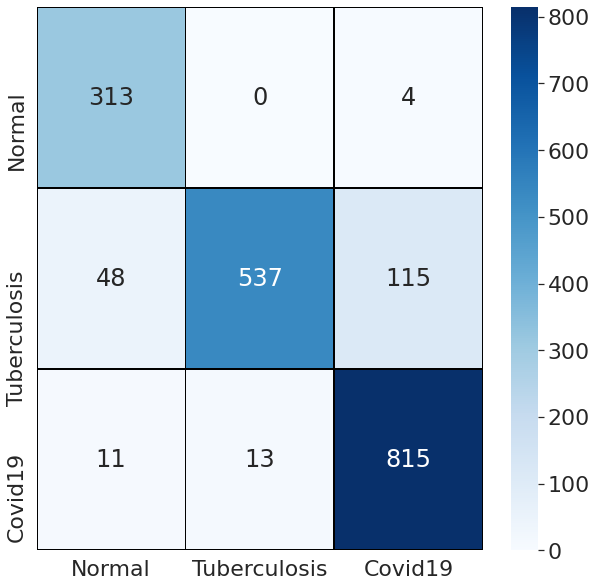

In [ ]:
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

### **1-6** GridSearchCV로 하이퍼 파라미터 최적화

In [ ]:
## GridSearchCV 로 하이퍼파라미터 최적화
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def model_builder(nodes, activation):
  model = Sequential()
  model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = activation , input_shape = (128, 128,1)))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(nodes , (3,3) , strides = 1 , padding = 'same' , activation = activation))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(nodes , (3,3) , strides = 1 , padding = 'same' , activation = activation))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = activation))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = activation))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Flatten())
  model.add(Dense(units = 128 , activation = activation))
  model.add(Dropout(0.2))
  model.add(Dense(units = 3 , activation = 'softmax'))
  model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

  return model

model = KerasClassifier(build_fn=model_builder, verbose=0)

## GridSearch
batch_size = [32, 64, 128]
nodes = [32, 64, 128]
epochs = [12, 20]
activation = ['relu', 'tanh']
param_grid = dict(batch_size=batch_size, epochs=epochs, nodes=nodes, activation=activation)

## GridSearch CV를 만들기
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 42.7min finished


In [ ]:
## 최적의 결과값을 낸 파라미터를 출력합니다
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8120133678118387 using {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'nodes': 128}
Means: 0.712796688079834, Stdev: 0.20505548001173438 with: {'activation': 'relu', 'batch_size': 32, 'epochs': 12, 'nodes': 32}
Means: 0.744597593943278, Stdev: 0.16670059610755367 with: {'activation': 'relu', 'batch_size': 32, 'epochs': 12, 'nodes': 64}
Means: 0.5195072193940481, Stdev: 0.35586652832551735 with: {'activation': 'relu', 'batch_size': 32, 'epochs': 12, 'nodes': 128}
Means: 0.7895326614379883, Stdev: 0.1333206044609731 with: {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'nodes': 32}
Means: 0.7465729514757792, Stdev: 0.13842923171550556 with: {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'nodes': 64}
Means: 0.8120133678118387, Stdev: 0.16664345413779705 with: {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'nodes': 128}
Means: 0.613718718290329, Stdev: 0.2533018808528278 with: {'activation': 'relu', 'batch_size': 64, 'epochs': 12, 'nodes': 32}
Means: 

In [ ]:
## 모델 재 정의

revised_model = model_builder(128, 'relu')

In [ ]:
## learning_rate_reduction 정의

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
## 모델 학습

history_2 = revised_model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/20
174/174 [==============================] - 10s 53ms/step - loss: 1.7462 - accuracy: 0.6835 - val_loss: 4.9351 - val_accuracy: 0.4520
Epoch 2/20
174/174 [==============================] - 9s 52ms/step - loss: 0.4624 - accuracy: 0.8315 - val_loss: 4.2695 - val_accuracy: 0.5286
Epoch 3/20
174/174 [==============================] - 9s 51ms/step - loss: 0.3311 - accuracy: 0.8820 - val_loss: 2.4584 - val_accuracy: 0.6579
Epoch 4/20
174/174 [==============================] - 9s 51ms/step - loss: 0.2839 - accuracy: 0.9038 - val_loss: 2.3151 - val_accuracy: 0.7091
Epoch 5/20
174/174 [==============================] - 9s 51ms/step - loss: 0.2519 - accuracy: 0.9078 - val_loss: 11.7420 - val_accuracy: 0.5156
Epoch 6/20
174/174 [==============================] - 9s 51ms/step - loss: 0.2228 - accuracy: 0.9230 - val_loss: 2.5912 - val_accuracy: 0.6837

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/20
174/174 [==============================] - 9s 51

In [ ]:
## 학습된 모델의 Loss와 Accuracy 출력

print("Loss of the model is - " , revised_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , revised_model.evaluate(x_test,y_test)[1]*100 , "%")

58/58 [==============================] - 1s 6ms/step - loss: 0.3754 - accuracy: 0.9224
Loss of the model is -  0.3754171133041382
58/58 [==============================] - 0s 6ms/step - loss: 0.3754 - accuracy: 0.9224
Accuracy of the model is -  92.24137663841248 %


In [ ]:
## 테스트셋 예측결과를 객체저장

predictions_2 = revised_model.predict_classes(x_test)
predictions_2 = predictions_2.reshape(1,-1)[0]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
## 카테고리별 precision    recall  f1-score와 accuracy 출력

print(classification_report(y_test, predictions_2, target_names = ['Normal (Class 0)','Tuberculosis (Class 1)', 'Covid19 (Class 2)']))

                        precision    recall  f1-score   support

      Normal (Class 0)       0.88      0.98      0.93       317
Tuberculosis (Class 1)       0.97      0.83      0.90       700
     Covid19 (Class 2)       0.91      0.97      0.94       839

              accuracy                           0.92      1856
             macro avg       0.92      0.93      0.92      1856
          weighted avg       0.93      0.92      0.92      1856



In [ ]:
## confusion_matrix 생성 시작

cm_2 = confusion_matrix(y_test,predictions_2)
cm_2 = pd.DataFrame(cm , index = ['0', '1', '2'] , columns = ['0', '1', '2'])

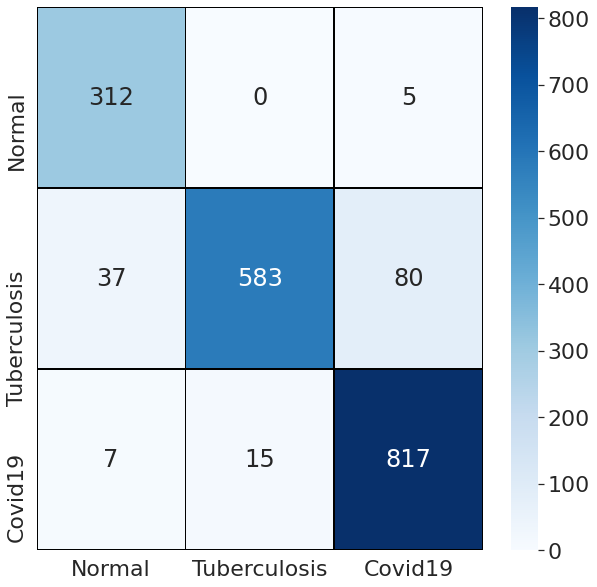

In [ ]:
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm_2,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
### 모델 저장하기
from keras.models import load_model
revised_model.save('Xray_classification_model.h5')

## **PART2. COVID-19 X-ray 이미지 생성(GAN활용)**

### **2-1** 패키지 호출

In [ ]:
# 패키지 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from IPython import display

print("Tensorflow Version: %s" % tf.__version__)
print("Keras Version: %s" %tf.keras.__version__)

Tensorflow Version: 2.4.1
Keras Version: 2.4.0


### **2-2** 데이터 전처리

In [ ]:
label_gan_1 = 'COVID19'
img_size = 128

def get_training_data_GAN(data_dir):
    data = []  
    path = os.path.join(data_dir, label_gan_1)    # data_dir = /content/chest_xray/chest_xray/train, label = 'PNEUMONIA' 이라면 os.path.join(data_dir, label)의 결과는 "/content/chest_xray/chest_xray/train/PNEUMONIA" 이다
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # 로컬경로의 이미지 파일 읽는법, GRAYSCALE : 이미지를 흑백으로 읽어들임
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append(resized_arr)
        except Exception as e:
            print(e)
    return data

In [ ]:
## COVID19 이미지 리스트화

covid = get_training_data_GAN('/content/Data/train')
covid_2 = get_training_data_GAN('/content/Data/test')

In [ ]:
## covid 이미지 통합

for i in covid_2 :
  covid.append(i)
len(covid)

576

In [ ]:
## 넘파이 어레이화

covid = np.array(covid)

In [ ]:
## Image Pixel Normalization [0,255] -> [-1,1] 

Y = covid
Y = (Y - 127.5) / 127.5 

print(Y[0])

[[-0.97647059 -0.2         0.92156863 ... -0.71764706 -0.67843137
  -0.67843137]
 [-0.99215686  0.02745098  0.94509804 ... -0.61568627 -0.69411765
  -0.70980392]
 [-0.98431373  0.30980392  0.30196078 ... -0.63137255 -0.78039216
  -0.76470588]
 ...
 [ 0.52156863  0.52156863  0.56862745 ...  0.28627451  0.34901961
   0.31764706]
 [ 0.54509804  0.56078431  0.5372549  ...  0.30980392  0.36470588
   0.3254902 ]
 [ 0.60784314  0.52941176  0.50588235 ...  0.34117647  0.35686275
   0.30196078]]


In [ ]:
Y.shape

(576, 128, 128)

In [ ]:
## 3D Vector 변환

width, height, channel = 128, 128, 1 # 이미지 사이즈 128*128 pixel 
Y = Y.reshape((Y.shape[0], width, height, channel))

print(Y.shape)

(576, 128, 128, 1)


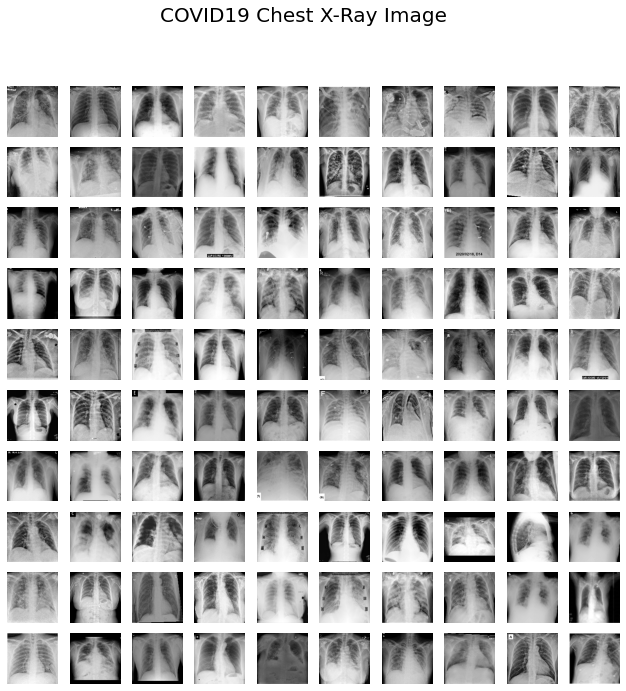

In [ ]:
## 이미지 시각화
 
plt.figure(figsize=(11,11))
    
i = 1
for image in Y:
    plt.subplot(10, 10, i) #(10*10) 총 100칸
    image = image.reshape(width, height)
    plt.imshow(image, cmap='gray') # 흑백 이미지
    plt.axis('off')
    i+=1
    if i > 100: break

plt.suptitle("COVID19 Chest X-Ray Image", fontsize = 20)
plt.show()

In [ ]:
## 학습 데이터 batch 준비

BATCH_SIZE = 64

# Input dataset + image randum shuffle
train_dataset = tf.data.Dataset.from_tensor_slices(Y).shuffle(Y.shape[0]).batch(BATCH_SIZE)

print(train_dataset)

<BatchDataset shapes: (None, 128, 128, 1), types: tf.float64>


### **2-3** Generator 모델 생성

In [ ]:
## Generator 모델 네트워크 구성

def build_generator_model():
    model = tf.keras.Sequential() # Keras 모델 생성

    model.add(layers.Dense(1024, input_dim=100, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(8*8*128, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Resahpe (8*8)
    model.add(layers.Reshape((8, 8, 128)))  
    
    model.add(layers.Conv2DTranspose(128, (5, 5), 
                                    strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization()) 
    model.add(layers.LeakyReLU())
    
    # (8*8) -> (16*16)
    model.add(layers.Conv2DTranspose(64, (5, 5), 
                                    strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # (16*16) -> (32*32) 
    model.add(layers.Conv2DTranspose(32, (5, 5), 
                                    strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # (32*32) -> (64*64) 
    model.add(layers.Conv2DTranspose(16, (5, 5), 
                                    strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # (64*64) -> (128*128) 
    model.add(layers.Conv2DTranspose(1, (5, 5), 
                                    strides=(2, 2), padding='same', activation='tanh'))
    assert model.output_shape == (None, 128, 128, 1)

    return model

In [ ]:
## 생성자 모델 생성

generator = build_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              102400    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              8388608   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 128)         0

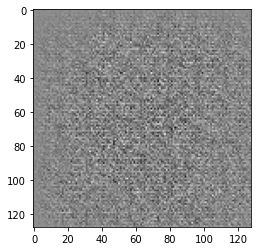

In [ ]:
## 학습되지 않은 생성자 모델이 만든 이미지

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### **2-3** Discriminator 모델 생성

In [ ]:
## Discriminator 모델 네트워크 구성


def build_discriminator_model():

    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(64, (5, 5), strides=2, padding='same', 
                       input_shape=[128, 128, 1])) # input image size
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=2, padding='same'))
    model.add(layers.LeakyReLU(0.2))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1))
    
    return model

In [ ]:
## Discriminator(판별자) 모델 생성

discriminator = build_discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1664      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [ ]:
## 학습되지 않은 판별자의 결과

predicted = discriminator(generated_image)
print(predicted)

tf.Tensor([[1.7148675e-05]], shape=(1, 1), dtype=float32)


In [ ]:
## Optimizer 생성

# 생성자용 옵티마이저
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
# 판별자용 옵티마이저
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
## BinaryCrossentropy for minMax

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
## Discriminator Loss 함수

# 판별자 모델 목표 :
# 1. 진짜 이미지를 판별했을 때 판별 값이 1에 가까워지도록
# 2. 가짜 이미지를 판별했을 때 판별 값이 0에 가까워지도록
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output) # 1. 1과 진짜 이미지 판별 값 비교
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) # 2. 0과 가짜 이미지 판별 값 비교
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
## Generator Loss 함수

# 생성자 모델 목표 : 
# 판별자 모델이 가짜 이미지를 판별했을 때 판별 값이 1에 가까워지도록
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output) # 1과 가짜 이미지를 판별 값 비교

### **2-4** GAN 학습

In [ ]:
## 학습 값 설정

EPOCHS = 4501
noise_dim = 100

In [ ]:
@tf.function
def train_step(images):
    # 생성자 input noise
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    # Gradient descent 계산 및 파라미터 업데이트
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True) # 진짜 이미지를 봤을 때의 판별 값
      fake_output = discriminator(generated_images, training=True) # 가짜 이미지를 봤을 때의 판별 값

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
## 테스트 노이즈 시각화 함수

test_noise = tf.random.normal([100, noise_dim]) # 학습 시각화를 위한 테스트 노이즈

def show_generated_images(epoch):
    images = generator.predict(test_noise)
    images = 0.5 * images + 0.5
    
    plt.figure(figsize=(11,11))
    
    i = 1
    for image in images:
        image = image.reshape(width, height)
        plt.subplot(10, 10, i)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        i+=1

    plt.suptitle("Generated Images on EPOCH: %s" % epoch, fontsize = 25)
    plt.show()

In [ ]:
## 학습 코드
def train(dataset, epochs):
  for epoch in range(epochs): # 전체 데이터 학습 반복 횟수(300)
  
    for image_batch in dataset: # batch 학습(64)
      train_step(image_batch)

    print("%s epochs trained" % epoch)

    if epoch % 300 == 0: # 300번째 에포크 마다 이미지 시각화
        show_generated_images(epoch)

In [ ]:
## 학습 시작!

train(train_dataset, EPOCHS)

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


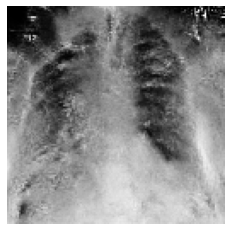

In [ ]:
## 폴더생성 및 생성된 이미지 저장
os.mkdir('/content/generated_img/')

images = generator.predict(test_noise)
plt.figure(figsize=(4,4))
i = 1
for image in images:
  image = image.reshape(width, height)
  plt.subplot(1, 1, 1)
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  BASE_DIR = "/content/generated_img/"
  plt.savefig(BASE_DIR + 'image_at_epoch_{:04d}.png'.format(i))
  i+=1

### **2-5** 생성된 이미지를 **PART1**의 최종모델에 넣어 예측

In [ ]:
## 저장한 이미지 가공 - 가공 함수 만들기

label = 'generated_img'
img_size = 128

def get_generated_data(data_dir):
    data = []  
    path = os.path.join(data_dir, label)    # data_dir = /content/chest_xray/chest_xray/train, label = 'PNEUMONIA' 이라면 os.path.join(data_dir, label)의 결과는 "/content/chest_xray/chest_xray/train/PNEUMONIA" 이다
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # 로컬경로의 이미지 파일 읽는법, GRAYSCALE : 이미지를 흑백으로 읽어들임
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append(resized_arr)
        except Exception as e:
            print(e)
    return data

In [ ]:
## 저장한 이미지 가공 - 이미지 객체 저장

generated_img = get_generated_data('/content')

In [ ]:
## 저장한 이미지 가공 - 넘파이 어레이화

generated_img = np.array(generated_img)

In [ ]:
## 저장한 이미지 가공 - 3D Vector 변환

width, height, channel = 128, 128, 1 # 이미지 사이즈 128*128 pixel 
generated_img = generated_img.reshape((generated_img.shape[0], width, height, channel))

print(generated_img.shape)

(100, 128, 128, 1)


In [ ]:
## 모델 불러오기
from keras.models import load_model
loaded_model = load_model('Xray_classification_model.h5')

## 모델 사용하기

new_predictions = loaded_model.predict_classes(generated_img)
new_predictions = new_predictions.reshape(1,-1)[0]
new_predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])